In [1]:
import thinkdsp
import thinkplot
import thinkstats2
import numpy as np

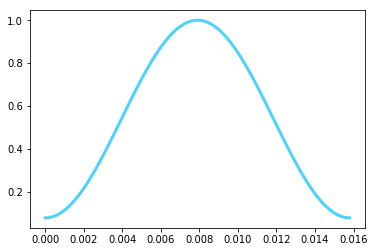

In [2]:
hamming = thinkdsp.Wave( ys=np.hamming(80), ts=np.arange(80))
hamming.__init__(ys=hamming.ys, framerate=5000)
hamming.plot()

In [3]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import time
from IPython import display
%matplotlib inline
beta = 0.35
i = 1
frt = 1500
left_seg = 200
right_seg = 400

def unbias(ys):
    """Shifts a wave array so it has mean 0.

    ys: wave array

    returns: wave array
    """
    return ys - ys.mean()


hamming = thinkdsp.Wave( ys=np.hamming(400), ts=np.arange(400))
hamming.__init__(ys=hamming.ys, framerate=frt)

while True:
 time_start=time.time()   
 try:
   plt.clf()
   #plt.plot(pd.Series(data=np.random.randn(100), index=i))
   ample = np.genfromtxt('五指张100.txt',dtype=None,invalid_raise = False)
   time.sleep(0.75)
   b = np.genfromtxt('五指张100.txt',dtype=None,invalid_raise = False)
    
   
   if ample.shape==(6,frt):
       ys = {"ys_"+str(n): ample[n] for n in range(6)}
       ts = np.arange(frt)
        
       wave_0 = thinkdsp.Wave(framerate=frt, ts=ts, ys=ys["ys_0"])
       wave_1 = thinkdsp.Wave(framerate=frt, ts=ts, ys=ys["ys_1"])
       wave_2 = thinkdsp.Wave(framerate=frt, ts=ts, ys=ys["ys_2"])
       wave_3 = thinkdsp.Wave(framerate=frt, ts=ts, ys=ys["ys_3"])
       wave_4 = thinkdsp.Wave(framerate=frt, ts=ts, ys=ys["ys_4"])
       wave_5 = thinkdsp.Wave(framerate=frt, ts=ts, ys=ys["ys_5"])
        
       wave_0.unbias()
       wave_1.unbias()
       wave_2.unbias()
       wave_3.unbias()
       wave_4.unbias()
       wave_5.unbias()
        
       p_0 = thinkdsp.Wave(framerate=frt, ts=ts, ys=wave_0.ys**2)
       
       
       convolve_0 = p_0.convolve(hamming)
       
    
       cut_0 = thinkdsp.Wave(framerate=frt, ys=convolve_0.ys)
       cut_0.ts =convolve_0.ts[convolve_0.ys > beta]
       
       if np.max(convolve_0.ys)> 1.8*beta :
           cut_0.ts =convolve_0.ts[convolve_0.ys > beta]
           
           if int(cut_0.ts[0]*frt)-left_seg >0:
               
               seg_0 = thinkdsp.Wave(framerate=frt, ys=wave_0.ys)
               seg_1 = thinkdsp.Wave(framerate=frt, ys=wave_1.ys)
               seg_2 = thinkdsp.Wave(framerate=frt, ys=wave_2.ys)
               seg_3 = thinkdsp.Wave(framerate=frt, ys=wave_3.ys)
               seg_4 = thinkdsp.Wave(framerate=frt, ys=wave_4.ys)
               seg_5 = thinkdsp.Wave(framerate=frt, ys=wave_5.ys)

               seg_0.ts = wave_0.ts[int(cut_0.ts[0]*frt)-left_seg:int(cut_0.ts[0]*frt)+right_seg]
               seg_0.ys = wave_0.ys[int(cut_0.ts[0]*frt)-left_seg:int(cut_0.ts[0]*frt)+right_seg]
               a = seg_0.ys

               seg_1.ts = wave_1.ts[int(cut_0.ts[0]*frt)-left_seg:int(cut_0.ts[0]*frt)+right_seg]
               seg_1.ys = wave_1.ys[int(cut_0.ts[0]*frt)-left_seg:int(cut_0.ts[0]*frt)+right_seg]

               seg_2.ts = wave_2.ts[int(cut_0.ts[0]*frt)-left_seg:int(cut_0.ts[0]*frt)+right_seg]
               seg_2.ys = wave_2.ys[int(cut_0.ts[0]*frt)-left_seg:int(cut_0.ts[0]*frt)+right_seg]
               seg_3.ts = wave_3.ts[int(cut_0.ts[0]*frt)-left_seg:int(cut_0.ts[0]*frt)+right_seg]
               seg_3.ys = wave_3.ys[int(cut_0.ts[0]*frt)-left_seg:int(cut_0.ts[0]*frt)+right_seg]

               seg_4.ts = wave_4.ts[int(cut_0.ts[0]*frt)-left_seg:int(cut_0.ts[0]*frt)+right_seg]
               seg_4.ys = wave_4.ys[int(cut_0.ts[0]*frt)-left_seg:int(cut_0.ts[0]*frt)+right_seg]
               seg_5.ts = wave_5.ts[int(cut_0.ts[0]*frt)-left_seg:int(cut_0.ts[0]*frt)+right_seg]
               seg_5.ys = wave_5.ys[int(cut_0.ts[0]*frt)-left_seg:int(cut_0.ts[0]*frt)+right_seg]

               
               if seg_0.ts.shape>(0,)and seg_0.ts.shape<(left_seg+right_seg,) :

                    w = b[0,0:left_seg+right_seg - a.shape[0]]

                    seg_0.ys = np.hstack((a,unbias(w)))
                    seg_0.ts = np.arange(left_seg+right_seg)
                    print("shape=",b.shape[0])


               if seg_1.ts.shape>(0,)and seg_1.ts.shape<(left_seg+right_seg,) :

                    r = b[1,0:left_seg+right_seg - a.shape[0]]

                    seg_1.ys = np.hstack((a,unbias(r)))
                    seg_1.ts = np.arange(left_seg+right_seg)
                    print("shape=",b.shape[0])

               if seg_2.ts.shape>(0,)and seg_2.ts.shape<(left_seg+right_seg,) :

                    p = b[2,0:left_seg+right_seg - a.shape[0]]

                    seg_2.ys = np.hstack((a,unbias(p)))
                    seg_2.ts = np.arange(left_seg+right_seg)
                    print("shape=",b.shape[0])

               if seg_3.ts.shape>(0,)and seg_3.ts.shape<(left_seg+right_seg,) :

                    t = b[3,0:left_seg+right_seg - a.shape[0]]

                    seg_3.ys = np.hstack((a,unbias(t)))
                    seg_3.ts = np.arange(left_seg+right_seg)
                    print("shape=",b.shape[0])   

               if seg_4.ts.shape>(0,)and seg_4.ts.shape<(left_seg+right_seg,) :

                    s = b[4,0:left_seg+right_seg - a.shape[0]]

                    seg_4.ys = np.hstack((a,unbias(s)))
                    seg_4.ts = np.arange(left_seg+right_seg)
                    print("shape=",b.shape[0])

               if seg_5.ts.shape>(0,)and seg_5.ts.shape<(left_seg+right_seg,) :

                    d = b[5,0:left_seg+right_seg - a.shape[0]]

                    seg_5.ys = np.hstack((a,unbias(d)))
                    seg_5.ts = np.arange(left_seg+right_seg)
                    print("shape=",b.shape[0])



               segment = np.vstack((seg_0.ys,seg_1.ys,seg_2.ys,seg_3.ys,seg_4.ys,seg_5.ys)) 
               #np.savetxt('向左\向左_'+str(i)+'.txt', segment, fmt = '%g', newline='\n')
               print("cut_0.ts[0]=",int(cut_0.ts[0]*frt))
               seg_1.plot()
               i=i+1
               time.sleep(0.3)
      
   display.display(plt.gcf())
   display.clear_output(wait=True)
   time.sleep(0.10)
   time_end=time.time()

   print('totally cost',time_end-time_start)
   print('i = ',i)
   
 except KeyboardInterrupt:
   break                              

<Figure size 432x288 with 0 Axes>

In [9]:
wave_2.ts.shape

(1500,)

In [16]:
cut_0.ts.shape

(1847,)

In [6]:
p.shape

(4, 1500)

In [33]:
cut_0.ts.shape

(0,)

In [36]:
convolve_0.ts[convolve_0.ys>beta]

array([], dtype=float64)

In [76]:
ample

array([[1.166, 1.165, 1.163, ..., 1.166, 1.168, 1.167],
       [1.183, 1.183, 1.184, ..., 1.183, 1.184, 1.184],
       [2.252, 2.253, 2.253, ..., 2.244, 2.244, 2.244],
       [2.233, 2.234, 2.232, ..., 2.234, 2.238, 2.233],
       [1.617, 1.613, 1.616, ..., 1.62 , 1.622, 1.617],
       [1.603, 1.604, 1.601, ..., 1.594, 1.605, 1.601]])

In [78]:
b.shape

(0,)

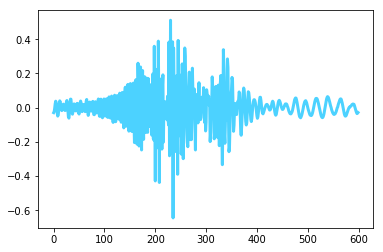

In [4]:
yk = np.loadtxt('向左\向左_89.txt')[0]
wav = thinkdsp.Wave(framerate=1500,ys=yk,ts=np.arange((len(yk))))
wav.plot()